In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
#push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")# "G:/tmp_ED_data/U2.0_b20.0_mu1.0.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (18))


[ Info: Reading Inputs...
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.000297843848 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000209554839 ≟ 0
╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.10852026, λd = 0.00000000, μ = 0.96521993, n = 0.99734713            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10477456,  Epot_2 =  0.12356106,  Δ = 8.2276%                   │
│  Ekin_1 = -0.22501136,  Ekin_2 = -0.20903607,  Δ = 3.6805%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10749338, λd = 3.76333511, μ = 0.96495795, n = 0.99734165            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10685015,  Epot_2 =  0.10685015,  Δ = 0.0

In [2]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=false)
res_m      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=true)
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=false)
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=true)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10749338, λd = 3.76333511, μ = 0.96495795, n = 0.99734165            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10685015,  Epot_2 =  0.10685015,  Δ = 0.0000%                   │
│  Ekin_1 = -0.23077724,  Ekin_2 = -0.20903607,  Δ = 4.9433%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


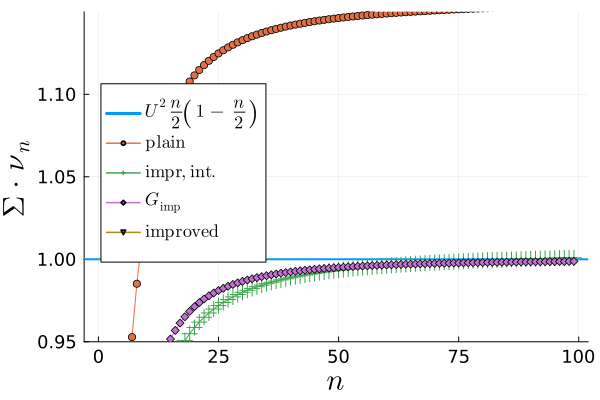

In [3]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]
#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = false);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = true);
tc_factor = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_term  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor)

hline([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(Σλ_ntc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{plain}")
plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{impr,int.}", markersize=8)
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term .* (U)  ))[3,:] .* iν_arr), markershape=:auto, label = L"\mathrm{improved}", ylims=(0.95,1.15), legend=:left)

In [4]:
tc_term

1×100 Matrix{ComplexF64}:
 -0.0+0.972976im  -0.0+0.324325im  -0.0+0.194595im  …  -0.0+0.00488933im

In [5]:
(se_ntc .- Σλ_ntc)[1,:]

100-element OffsetArray(::Vector{ComplexF64}, 0:99) with eltype ComplexF64 with indices 0:99:
     -0.6987045361717568 - 1.7184545171041874im
    -0.35196935373329075 - 1.6123296534157738im
    -0.22808052823704394 - 1.3380204191138743im
     -0.1565761264251846 - 1.112995999473744im
    -0.11062028891641051 - 0.9419092068715647im
    -0.08056698431253784 - 0.811527451999386im
    -0.06049674310163722 - 0.710366140321073im
    -0.04672444506791118 - 0.6302470414539191im
     -0.0369964477325464 - 0.5655415510278021im
   -0.029930241518407397 - 0.5123594076773851im
    -0.02466364334827864 - 0.46796837111981626im
   -0.020646633519230795 - 0.4304117219681678im
   -0.017519474047360872 - 0.39826000166741604im
                         ⋮
 -0.00033271982207772055 - 0.05785445821231653im
  -0.0003252950033261204 - 0.057208253812073576im
  -0.0003181168755491681 - 0.056576320717994566im
  -0.0003111746239861102 - 0.05595819141849975im
   -0.000304458075604197 - 0.05535341865824371im
  -0.0002

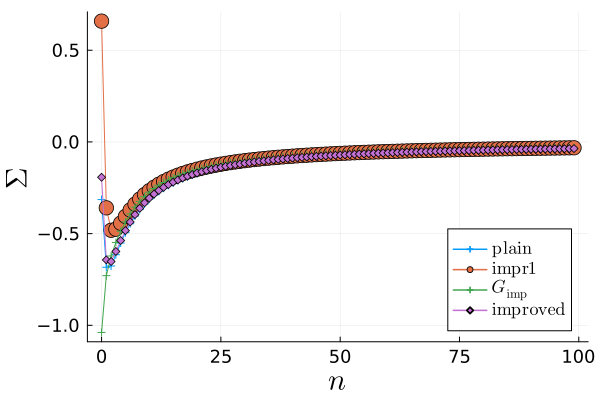

In [6]:

plot(xr, imag(Σλ_ntc[1,:].parent), markershape=:auto, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr}1", markersize=8)
plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ tc_term ./ (2*U^2))[1,:] ), markershape=:auto, label = L"\mathrm{improved}", legend=:bottomright)

In [ ]:
heatmap(real(γm[end,:,:]))

In [ ]:
heatmap(real(γd[end,:,:]))

In [ ]:
plot(real(γd[end,1,:]))

In [ ]:
plot(real(γd[end,1,:] .- 3 .* γm[end,51,:]))

In [ ]:
plot(imag(γm[1,1,:]))

In [ ]:
plot(real(γd[end,50,:]))

In [ ]:
plot(imag(γd[end,50,:]))

In [ ]:
heatmap(imag(γd[end,:,:]))

In [ ]:
γm

In [ ]:
results_λm, results_λd, results_n, results_mu, results_E_kin_1, results_E_pot_1, results_E_pot_2, results_E_lhs_c1 = LadderDGA.LambdaCorrection.λdm_correction_curve(χm, γm, χd, γd, λ₀, lDGAhelper; λd_max=30.0, λd_samples=500, tc=true)
plot(results_λd, results_E_pot_2 .- results_E_pot_1, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"E^{(2)}_\mathrm{pot} - E^{(1)}_\mathrm{pot}", label="No Tail Correction")